C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows wi

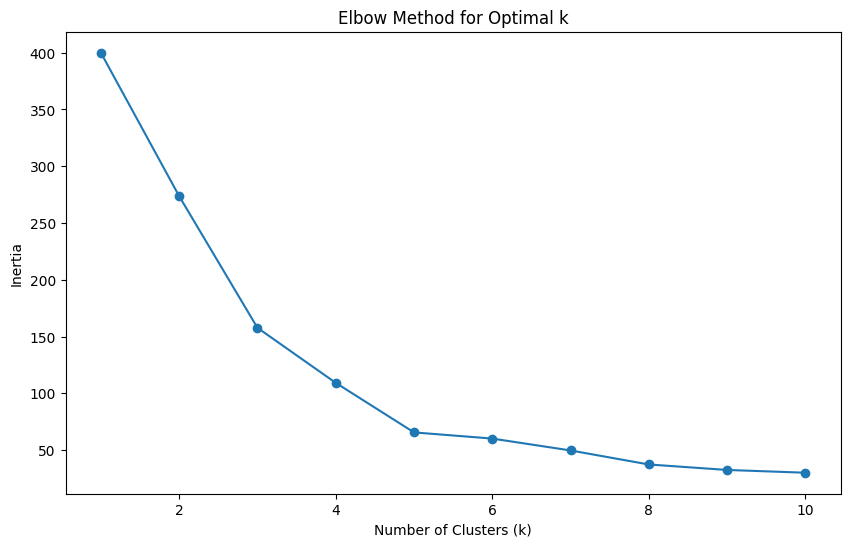

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


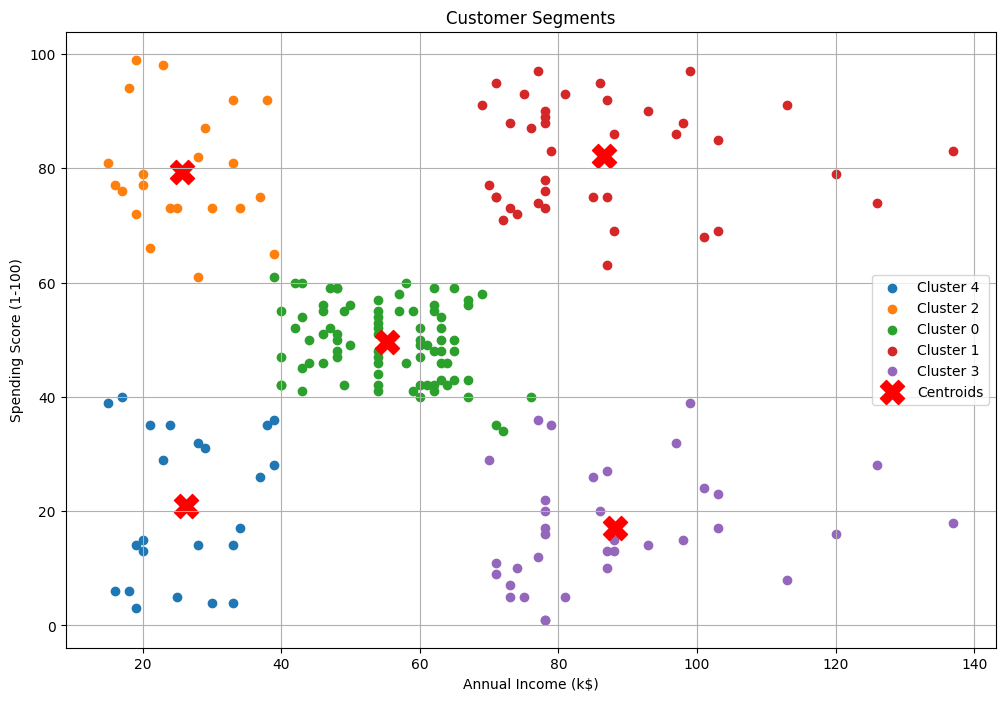

Cluster Analysis (Average Values):
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043

Gender Distribution in Clusters:
Cluster
0    Female
1    Female
2    Female
3      Male
4    Female
Name: Gender, dtype: object


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Select features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means clustering with optimal k (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(12, 8))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], 
                cluster_data['Spending Score (1-100)'], 
                label=f'Cluster {cluster}')

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Cluster analysis
print("Cluster Analysis (Average Values):")
print(df.groupby('Cluster').mean(numeric_only=True))

# Gender distribution in clusters (optional)
print("\nGender Distribution in Clusters:")
print(df.groupby('Cluster')['Gender'].agg(lambda x: x.mode()[0]))


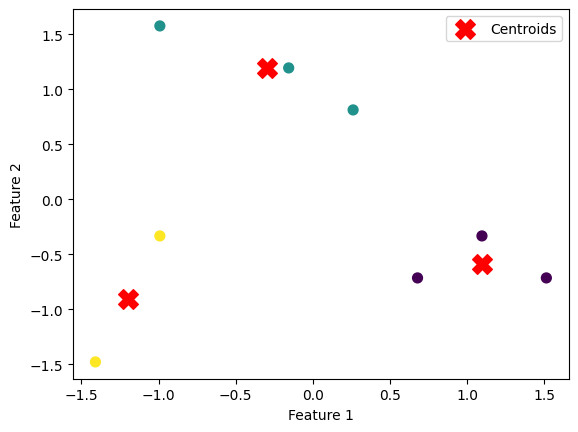

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Data points (extracted from image)
data = np.array([
    [2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]
])

# Scaling features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 2D Visualization
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

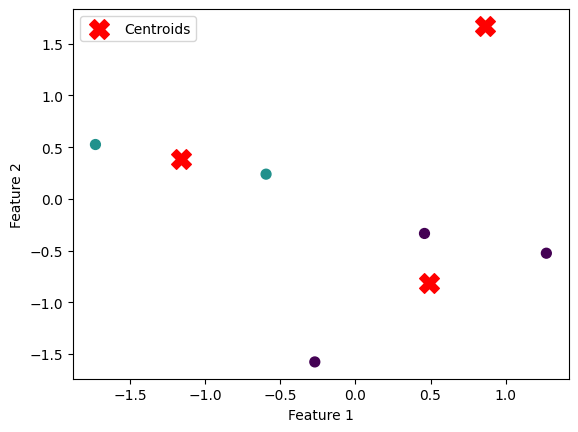

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data points (from the provided table)
data = np.array([
    [0.40, 0.53], [0.22, 0.38], [0.35, 0.32], [0.26, 0.19], [0.08, 0.41], [0.45, 0.30]
])

# Scaling features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 2D Visualization
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

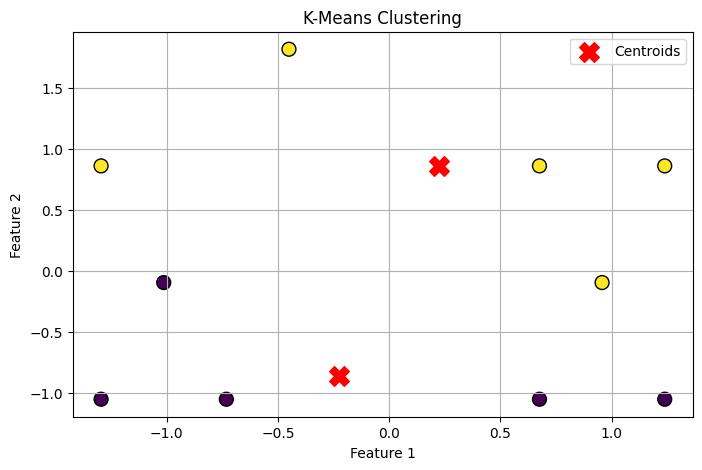

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data points (new dataset)
data = np.array([
    [1, 1], [1, 3], [2, 2], [3, 1], [4, 4], [8, 1], [8, 3], [9, 2], [10, 1], [10, 3]
])

# Initial cluster centers
init_centers = np.array([[1, 1], [4, 4]])

# Scaling features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
init_centers_scaled = scaler.transform(init_centers)

# Apply K-Means
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, init=init_centers_scaled, n_init=1, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


# Standard 2D Visualization
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=100, edgecolors='black')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("K-Means Clustering")
plt.legend()
plt.grid(True)
plt.show()